## Importamos las librerias necesarias

In [11]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [30]:
from sklearn.preprocessing import MinMaxScaler

## Manejo de archivos simplificado

In [3]:
# Manejo simplificado de archivos
files = os.listdir('./Complementary/')
files = [ file for file in files if not(file.endswith('.pdf'))  ]
dict_files = {'df{}'.format(i+1): file for i, file in enumerate(files)}

In [4]:
dict_files

{'df1': 'air_quality_data.csv',
 'df2': 'car_noise.csv',
 'df3': 'fuel_consumption_ratings',
 'df4': 'yellow_taxis'}

In [ ]:
# Alternativamente es posible leer cada archivo por separado por ejemplo:
# df = pd.read_csv("./Complementary/air_quality_data.csv")

### Se abrirán los archivos relacionados en tema vehiculos, según el DER y se normalizaran datos y nombres de columnas, a modo de obtener los datos coherentes  y congruentes entres si.

_____________________________________________________

## Archivo 'air_quality_data.csv'

In [5]:
dict_files['df1']

'air_quality_data.csv'

In [54]:
df1 = pd.read_csv('./Complementary/' + dict_files['df1']) 
df1.head()

,aqi,dt,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,5,2020/11/24,1815.80,211.00,79.51,0.0,7.87,63.81,90.35,14.06
1,5,2020/11/24,2056.12,239.61,80.20,0.0,8.35,77.15,110.21,15.07
2,5,2020/11/24,2189.64,257.49,79.51,0.0,8.94,86.94,126.06,16.47
3,5,2020/11/24,2349.85,278.95,80.88,0.0,9.30,96.19,141.36,15.58
4,5,2020/11/25,2109.53,246.76,76.08,0.0,7.99,83.11,129.25,9.12


#### **Análisis de las variables del dataset**

- 'aqi': El Índice de Calidad del Aire (ICA) es un número que se utiliza para comunicar la calidad general del aire a la población. Puede ser calculado de diferentes maneras, generalmente en función de los niveles de varios contaminantes del aire.


- 'dt': Esta es la fecha en que se registraron las mediciones de calidad del aire.


- 'co': Monóxido de carbono (CO) es un gas incoloro e inodoro que puede ser perjudicial para la salud humana en altas concentraciones. Se deriva principalmente de la combustión incompleta de carbono en motores de automóviles y otras fuentes.


- 'no': Óxido nítrico (NO) es un gas producido principalmente por la quema de combustibles fósiles. Puede contribuir a la formación de smog y al deterioro de la calidad del aire.


- 'no2': Dióxido de nitrógeno (NO2) es otro gas relacionado con la quema de combustibles fósiles. Puede causar problemas respiratorios y contribuir a la formación de smog.


- 'o3': Ozono (O3) en la troposfera es un contaminante del aire que puede ser perjudicial para la salud. Se forma a partir de reacciones químicas entre óxidos de nitrógeno y compuestos orgánicos volátiles en presencia de la luz solar.


- 'so2': Dióxido de azufre (SO2) es un gas que se produce por la quema de combustibles fósiles, especialmente en plantas de energía y procesos industriales. Puede tener efectos negativos en la salud y el medio ambiente.


- 'pm2_5': Partículas finas (PM2.5) son partículas suspendidas en el aire que tienen un diámetro de 2.5 micrómetros o menos. Pueden penetrar profundamente en los pulmones y estar relacionadas con problemas de salud respiratoria.


- 'pm10': Partículas en suspensión (PM10) son partículas con un diámetro de 10 micrómetros o menos. Aunque son más grandes que las PM2.5, aún pueden tener efectos negativos en la salud.


- 'nh3': Amoníaco (NH3) es un gas que puede provenir de fuentes agrícolas y de la industria. Puede contribuir a la formación de partículas y afectar la calidad del aire.

In [45]:
df1.columns

Index(['aqi', 'dt', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

<Axes: >

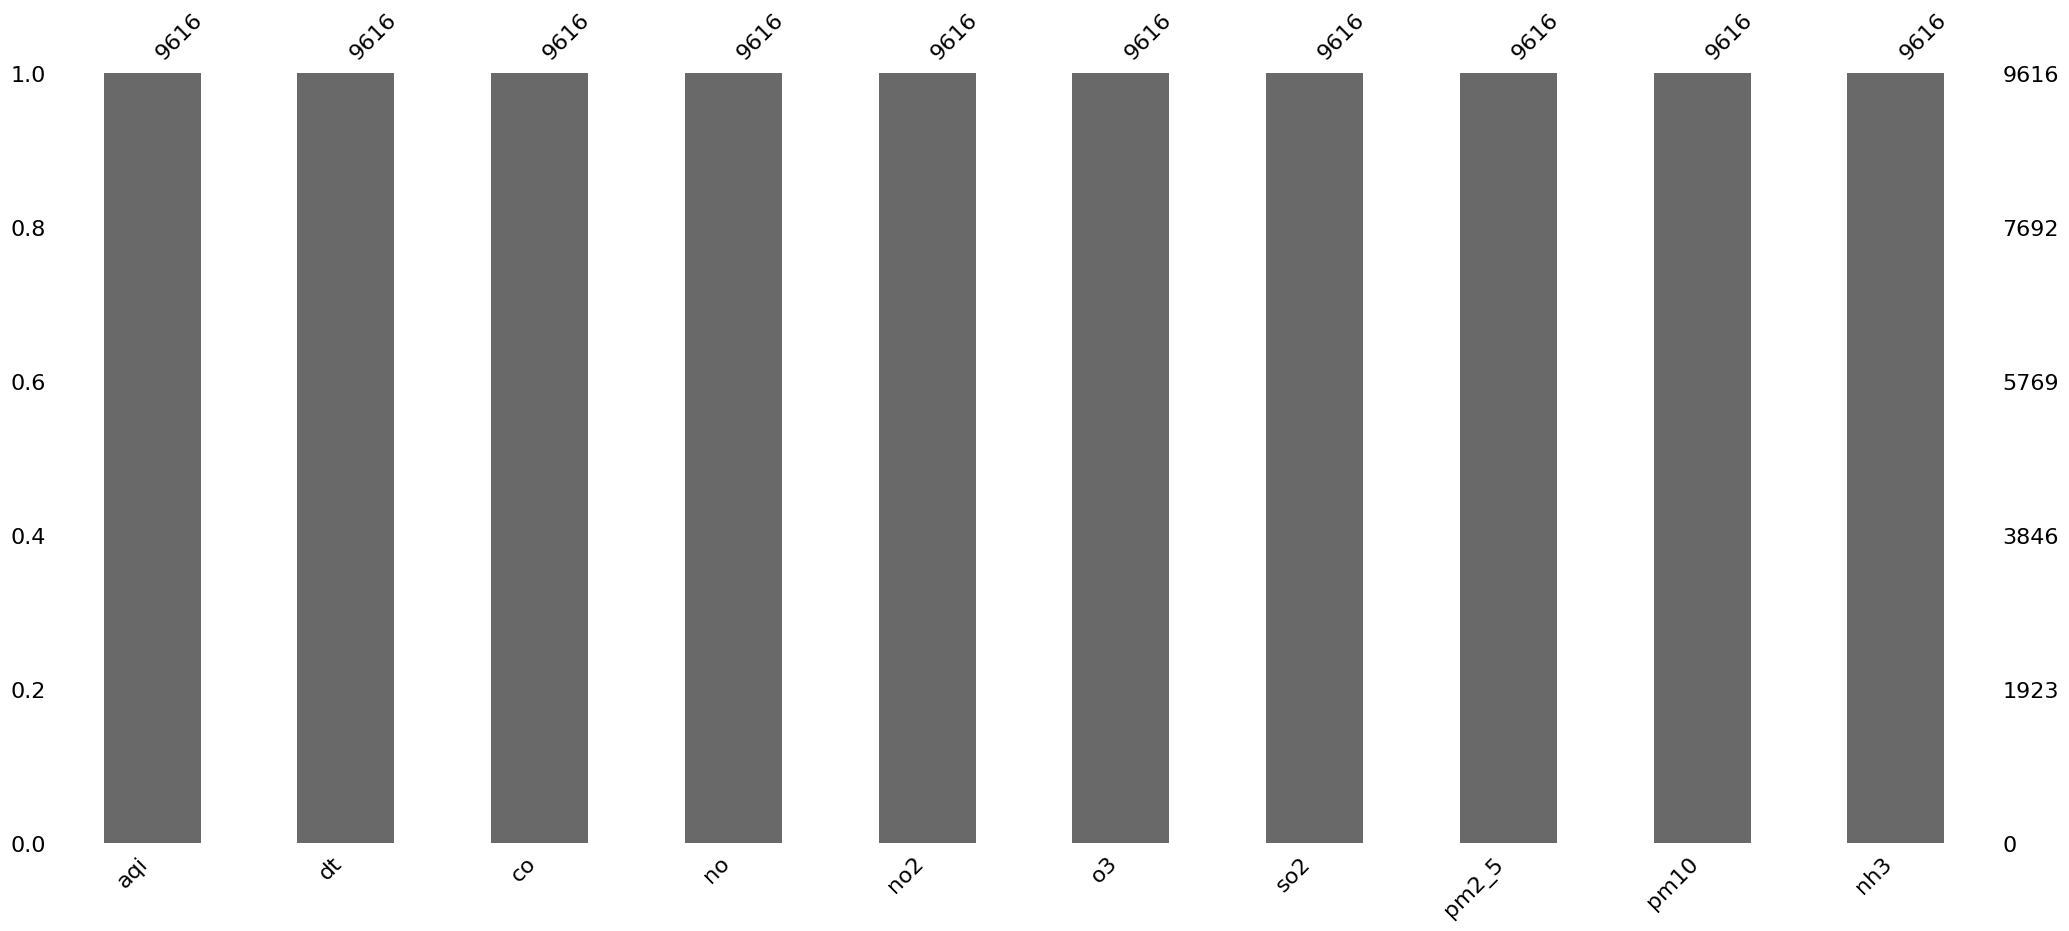

In [17]:
msno.bar(df1)

En este caso no se cuenta con columnas sin valores. 

In [55]:
# Convertir la columna 'dt' a objetos de fecha
df1['dt'] = pd.to_datetime(df1['dt'])

# Extraer los años de la columna 'dt' (nueva columna "year")
df1['year'] = df1['dt'].dt.year

# Hallar el mínimo y el máximo de años
min_year = df1['year'].min()
max_year = df1['year'].max()

# Resultados
print(f"Año mínimo: {min_year}")
print(f"Año máximo: {max_year}")

Año mínimo: 2020
Año máximo: 2021


Los registros de este archivo corresponden a los años 2020 a 2021

In [56]:
# Seleccionar solo las columnas numéricas para la normalización
numeric_columns = ['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
df_numeric = df1[numeric_columns]

# Crear un objeto MinMaxScaler para la normalización
scaler = MinMaxScaler()

# Aplicar la normalización a los datos numéricos
df_normalized_values = scaler.fit_transform(df_numeric)

# Crear un nuevo DataFrame con los datos normalizados y la columna 'dt' sin cambios
df1_normalized = pd.DataFrame(df_normalized_values, columns=numeric_columns)
df1_normalized['dt'] = df1['dt']

# Mostrar el DataFrame normalizado
print(df1_normalized)

      aqi        co        no       no2        o3       so2     pm2_5  \
0     1.0  0.399675  0.359755  0.404429  0.000000  0.097842  0.191697   
1     1.0  0.458402  0.408535  0.408084  0.000000  0.104748  0.232090   
2     1.0  0.491029  0.439021  0.404429  0.000000  0.113237  0.261733   
3     1.0  0.530179  0.475610  0.411687  0.000000  0.118417  0.289741   
4     1.0  0.471453  0.420726  0.386258  0.000000  0.099568  0.250136   
...   ...       ...       ...       ...       ...       ...       ...   
9611  1.0  0.298532  0.253056  0.241047  0.000000  0.106331  0.206292   
9612  1.0  0.484502  0.457315  0.288250  0.000000  0.137266  0.345213   
9613  1.0  0.601959  0.603656  0.320937  0.000025  0.174964  0.433053   
9614  1.0  0.556282  0.567066  0.317281  0.000098  0.255683  0.399080   
9615  1.0  0.275694  0.265247  0.306421  0.000320  0.471799  0.189850   

          pm10       nh3         dt  
0     0.228965  0.213364 2020-11-24  
1     0.279664  0.228702 2020-11-24  
2     0.3

In [57]:
df1_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9616 entries, 0 to 9615
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   aqi     9616 non-null   float64       
 1   co      9616 non-null   float64       
 2   no      9616 non-null   float64       
 3   no2     9616 non-null   float64       
 4   o3      9616 non-null   float64       
 5   so2     9616 non-null   float64       
 6   pm2_5   9616 non-null   float64       
 7   pm10    9616 non-null   float64       
 8   nh3     9616 non-null   float64       
 9   dt      9616 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(9)
memory usage: 751.4 KB


# SELECCIONAR LA OPCION A TRABAJAR

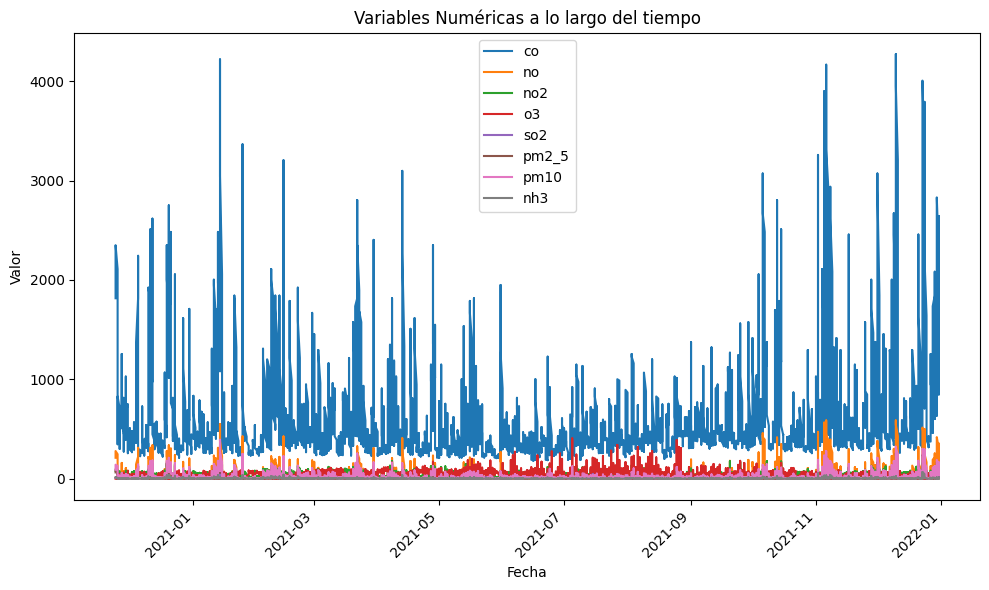

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes df1 definido con los datos

# Seleccionar las variables numéricas
numeric_columns = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Configurar el DataFrame para usar 'dt' como índice
df1.set_index('dt', inplace=True)

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
df1[numeric_columns].plot(ax=plt.gca())

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Variables Numéricas a lo largo del tiempo')
plt.legend()
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


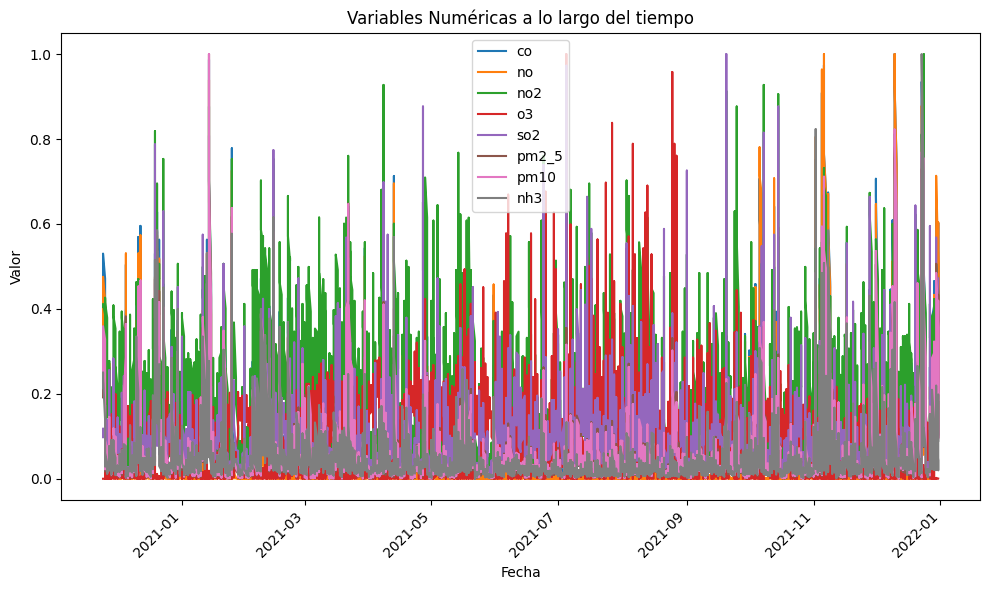

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes df1 definido con los datos

# Seleccionar las variables numéricas
numeric_columns = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Configurar el DataFrame para usar 'dt' como índice
df1_normalized.set_index('dt', inplace=True)

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
df1_normalized[numeric_columns].plot(ax=plt.gca())

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Variables Numéricas a lo largo del tiempo')
plt.legend()
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


_________________________________________________

### Archivo 'car_noise.csv'

In [59]:
dict_files['df2']

'car_noise.csv'

In [71]:
df2 = pd.read_csv('./Complementary/' + dict_files['df2']) 
df2.head()

,Brand,Model,Spec,Year,dB at idle,dB at 55 mph,dB at 65 mph,dB at 70 mph,dB at 75 mph,dB at 85 mph
0,Abarth,500,1.4 16v T-Jet,2008,47.3,67.3,70.2,70.4,72.9,75.6
1,Abarth,595,Competizione,2017,49.9,69.1,72.5,72.8,72.2,75.8
2,Acura,MDX,3.5 V6,2013,41.7,59.0,62.0,62.2,64.9,65.9
3,Acura,RDX,3.5 V6,2012,43.0,62.7,66.1,66.3,68.4,69.1
4,Acura,RL,3.7 V6,2009,43.6,64.3,67.9,68.1,71.3,72.4


#### **Análisis de las variables del dataset**

- 'Brand': Representa la marca del vehículo.

- 'Model': Representa el modelo del vehículo.

- 'Spec': Puede representar las especificaciones del vehículo, como la versión o el tipo de motor.

- 'Year': Representa el año de fabricación del vehículo.

- 'dB at idle': Representa el nivel de ruido en decibelios (dB) producido por el vehículo cuando está en ralentí (parado sin moverse).

- 'dB at 55 mph': Representa el nivel de ruido en decibelios (dB) producido por el vehículo a una velocidad de 55 millas por hora (aproximadamente 88.5 km/h).

- 'dB at 65 mph': Representa el nivel de ruido en decibelios (dB) producido por el vehículo a una velocidad de 65 millas por hora (aproximadamente 104.6 km/h).

- 'dB at 70 mph': Representa el nivel de ruido en decibelios (dB) producido por el vehículo a una velocidad de 70 millas por hora (aproximadamente 112.7 km/h).

- 'dB at 75 mph': Representa el nivel de ruido en decibelios (dB) producido por el vehículo a una velocidad de 75 millas por hora (aproximadamente 120.7 km/h).

- 'dB at 85 mph': Representa el nivel de ruido en decibelios (dB) producido por el vehículo a una velocidad de 85 millas por hora (aproximadamente 136.8 km/h).

In [72]:
df2.columns

Index(['Brand', 'Model', 'Spec', 'Year', 'dB at idle', 'dB at 55 mph',
       'dB at 65 mph', 'dB at 70 mph', 'dB at 75 mph', 'dB at 85 mph'],
      dtype='object')

<Axes: >

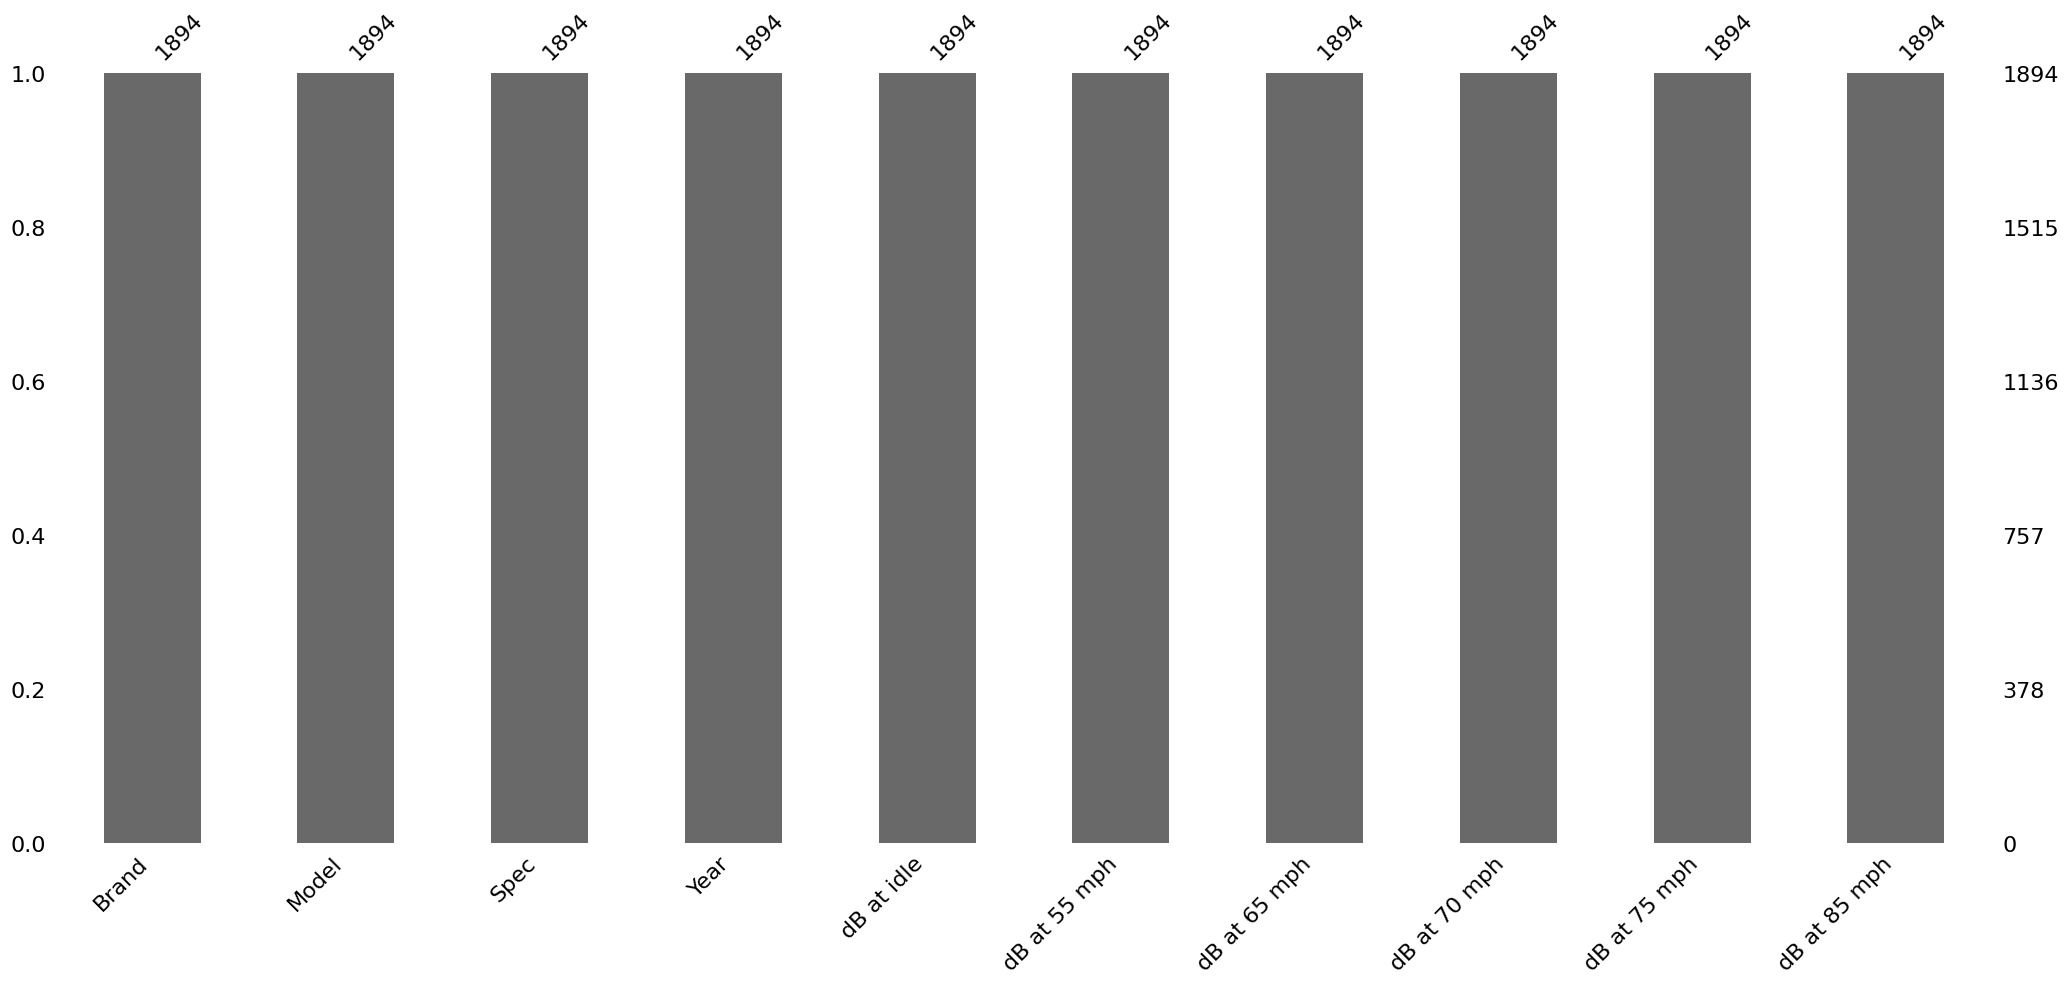

In [62]:
msno.bar(df2)

In [ ]:
En este caso no se cuenta con columnas sin valores. 

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         1894 non-null   object 
 1   Model         1894 non-null   object 
 2   Spec          1894 non-null   object 
 3   Year          1894 non-null   int64  
 4   dB at idle    1894 non-null   float64
 5   dB at 55 mph  1894 non-null   float64
 6   dB at 65 mph  1894 non-null   float64
 7   dB at 70 mph  1894 non-null   float64
 8   dB at 75 mph  1894 non-null   float64
 9   dB at 85 mph  1894 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 148.1+ KB


FILTRAR MODELOS DEL AÑO 2022

#### Análisis de duplicados

Se procede a revisar la combinacion de información y los valores repetidos. 
En este caso, tanto la marca (Brand), el modelo (model), y sus respectivas especificaciones del motor (spec) pueden encontrarse vinculadas, por lo que se suma el valor del año de lanzamiento (year) para encontrar aquellas filas que dupliquen la información

Hay duplicadas 90 filas
Pero si se suma a lo anterior las mediciones de db at idle, son 14 --> significa que hay valores que se midieron 2 veces para algunos modelos? --> calidad del dato mala

123               Audi-Q5-2.0 TDI-2017-41.9  
124               Audi-Q5-2.0 TDI-2017-41.9  
929              Mazda-3-1.6 CITD-2011-44.7  
930              Mazda-3-1.6 CITD-2011-44.7  
944   Mazda-6-2.2 CiTD Stationcar-2011-43.1  
945   Mazda-6-2.2 CiTD Stationcar-2011-43.1  
990                Mercedes-C-180-2011-44.9  
991                Mercedes-C-180-2011-44.9  
1298          Peugeot-308-1.6 HDI-2011-44.7  
1299          Peugeot-308-1.6 HDI-2011-44.7  
1613           Suzuki-Kizashi-2.4-2011-44.7  
1614           Suzuki-Kizashi-2.4-2011-44.7  
1707           Toyota-Verso-S-1.3-2011-45.6  
1708           Toyota-Verso-S-1.3-2011-45.6  

In [82]:
# Crear una nueva columna combinando 'Brand', 'Model', 'Spec' y 'Year'
df2['Combined'] = df2['Brand'] + '-' + df2['Model'] + '-' + df2['Spec'] + '-' + df2['Year'].astype(str)

# Identificar filas duplicadas basadas en la columna combinada
duplicated_rows = df2[df2['Combined'].duplicated(keep=False)]

# Mostrar las filas duplicadas
if not duplicated_rows.empty:
    print("Filas duplicadas:")
    print(duplicated_rows[['Brand', 'Model', 'Spec', 'Year', 'Combined']])
else:
    print("No se encontraron filas duplicadas.")

Filas duplicadas:
           Brand    Model     Spec  Year                        Combined
89          Audi       A6  2.0 TDI  2016            Audi-A6-2.0 TDI-2016
90          Audi       A6  2.0 TDI  2016            Audi-A6-2.0 TDI-2016
123         Audi       Q5  2.0 TDI  2017            Audi-Q5-2.0 TDI-2017
124         Audi       Q5  2.0 TDI  2017            Audi-Q5-2.0 TDI-2017
218          BMW        3     328i  2012                 BMW-3-328i-2012
...          ...      ...      ...   ...                             ...
1708      Toyota  Verso-S      1.3  2011         Toyota-Verso-S-1.3-2011
1755  Volkswagen     Golf      1.0  2016        Volkswagen-Golf-1.0-2016
1756  Volkswagen     Golf      1.0  2016        Volkswagen-Golf-1.0-2016
1778  Volkswagen   Passat  1.4 TSI  2011  Volkswagen-Passat-1.4 TSI-2011
1779  Volkswagen   Passat  1.4 TSI  2011  Volkswagen-Passat-1.4 TSI-2011

[90 rows x 5 columns]


In [83]:
# Crear una nueva columna combinando 'Brand', 'Model', 'Spec', 'Year' y 'dB at idle'
df2['Combined'] = df2['Brand'] + '-' + df2['Model'] + '-' + df2['Spec'] + '-' + df2['Year'].astype(str) + '-' + df2['dB at idle'].astype(str)

# Identificar filas duplicadas basadas en la columna combinada
duplicated_rows = df2[df2['Combined'].duplicated(keep=False)]

# Mostrar las filas duplicadas
if not duplicated_rows.empty:
    print("Filas duplicadas:")
    print(duplicated_rows[['Brand', 'Model', 'Spec', 'Year', 'dB at idle', 'Combined']])
    print("Cantidad de filas duplicadas:", len(duplicated_rows))
else:
    print("No se encontraron filas duplicadas.")


Filas duplicadas:
         Brand    Model                 Spec  Year  dB at idle  \
123       Audi       Q5              2.0 TDI  2017        41.9   
124       Audi       Q5              2.0 TDI  2017        41.9   
929      Mazda        3             1.6 CITD  2011        44.7   
930      Mazda        3             1.6 CITD  2011        44.7   
944      Mazda        6  2.2 CiTD Stationcar  2011        43.1   
945      Mazda        6  2.2 CiTD Stationcar  2011        43.1   
990   Mercedes        C                  180  2011        44.9   
991   Mercedes        C                  180  2011        44.9   
1298   Peugeot      308              1.6 HDI  2011        44.7   
1299   Peugeot      308              1.6 HDI  2011        44.7   
1613    Suzuki  Kizashi                  2.4  2011        44.7   
1614    Suzuki  Kizashi                  2.4  2011        44.7   
1707    Toyota  Verso-S                  1.3  2011        45.6   
1708    Toyota  Verso-S                  1.3  2011        

Pero si consideramos otro sonido, son 16

In [84]:
# Crear una nueva columna combinando 'Brand', 'Model', 'Spec', 'Year' y 'dB at 55 mph'
df2['Combined'] = df2['Brand'] + '-' + df2['Model'] + '-' + df2['Spec'] + '-' + df2['Year'].astype(str) + '-' + df2['dB at 55 mph'].astype(str)

# Identificar filas duplicadas basadas en la columna combinada
duplicated_rows = df2[df2['Combined'].duplicated(keep=False)]

# Mostrar las filas duplicadas
if not duplicated_rows.empty:
    print("Filas duplicadas:")
    print(duplicated_rows[['Brand', 'Model', 'Spec', 'Year', 'dB at idle','dB at 55 mph', 'Combined']])
    print("Cantidad de filas duplicadas:", len(duplicated_rows))
else:
    print("No se encontraron filas duplicadas.")

Filas duplicadas:
         Brand    Model                 Spec  Year  dB at idle  dB at 55 mph  \
123       Audi       Q5              2.0 TDI  2017        41.9          61.6   
124       Audi       Q5              2.0 TDI  2017        41.9          61.6   
929      Mazda        3             1.6 CITD  2011        44.7          63.6   
930      Mazda        3             1.6 CITD  2011        44.7          63.6   
944      Mazda        6  2.2 CiTD Stationcar  2011        43.1          61.3   
945      Mazda        6  2.2 CiTD Stationcar  2011        43.1          61.3   
990   Mercedes        C                  180  2011        44.9          63.8   
991   Mercedes        C                  180  2011        44.9          63.8   
1160    Nissan    Micra                  0.9  2017        44.5          62.2   
1161    Nissan    Micra                  0.9  2017        41.3          62.2   
1298   Peugeot      308              1.6 HDI  2011        44.7          63.5   
1299   Peugeot      30

C:\Users\AGaby\AppData\Local\Temp\ipykernel_6396\288066976.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

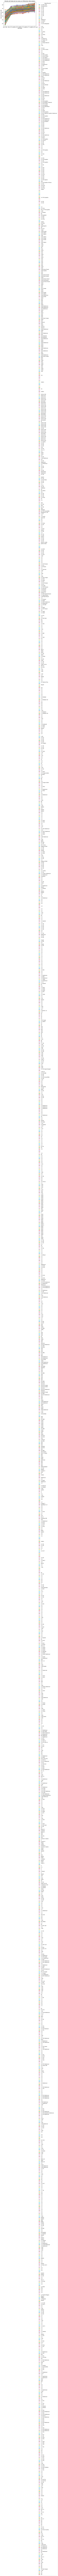

In [64]:
# Seleccionar las columnas relevantes para los niveles de ruido
noise_columns = ['dB at idle', 'dB at 55 mph', 'dB at 65 mph', 'dB at 70 mph', 'dB at 75 mph', 'dB at 85 mph']

# Configurar el DataFrame para usar 'Spec' como índice (puede ser 'Brand', 'Model', etc)
df2.set_index('Spec', inplace=True)

# Crear un gráfico de líneas para cada nivel de ruido
plt.figure(figsize=(10, 6))
df2[noise_columns].T.plot(kind='line', marker='o')

# Personalizar el gráfico
plt.xlabel('Velocidad')
plt.ylabel('Nivel de Ruido (dB)')
plt.title('Niveles de Ruido de los Autos en Diferentes Velocidades')
plt.legend(title='Especificación', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Archivos 'yellow_taxis' (parquet)

In [ ]:
dict_files['df2']

In [ ]:
df2 = pd.read_csv('./Complementary/' + dict_files['df2']) 
df2.head()

In [ ]:
df2.columns

In [ ]:
msno.bar(df1)

### Archivo 'car_noise.csv'

Min-Max Scaling: Escala los valores de las características para que estén dentro de un rango específico, generalmente entre 0 y 1. Esto se logra restando el valor mínimo y dividiendo por el rango (diferencia entre el valor máximo y el valor mínimo).

Z-Score (Standardization): Transforma los valores de las características para que tengan una media de 0 y una desviación estándar de 1. Esto se logra restando la media y dividiendo por la desviación estándar.

Robust Scaling: Similar al Min-Max Scaling, pero utiliza estadísticas resistentes a valores atípicos, como la mediana y el rango intercuartil, en lugar de la media y la desviación estándar.

Max Abs Scaling: Escala los valores dividiendo por el valor absoluto máximo. Esto puede ser útil cuando los datos tienen valores muy grandes.

Unit Vector Scaling: También conocido como Normalización L2, escala los valores de manera que la norma (longitud) del vector de características sea igual a 1. Es útil cuando las magnitudes absolutas de los valores no son tan importantes como las direcciones relativas de las características.